In [1]:
import numpy as np 
import pandas as pd 

Text(0, 0.5, 'x2')

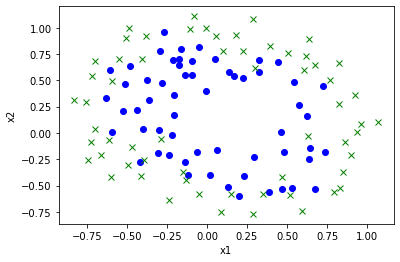

In [2]:
df = pd.read_csv('ex2data2.csv')
pos = np.array(df[df['y'] == 1])
neg = np.array(df[df['y'] == 0])

import matplotlib.pyplot as plt
plt.plot(pos[:,0],pos[:,1],'bo')
plt.plot(neg[:,0],neg[:,1],'gx')
plt.xlabel('x1')
plt.ylabel('x2')

## Using higher order features for classification like: ${x_1}$, ${x_2}$, ${x_1}^2$, ${x_2}^2$, ${x_1 x_2}$, ${x_1}^3$, ${x_2}^3$, ${x_1 {x_2}^2}$, ${x_1}^2{x_2}$ ...., ${x_2}^6$

In [3]:
# data is already close to normalized as :
print(np.mean(pos[:,1]),np.mean(pos[:,2]))
print(np.std(pos[:,1]),np.std(pos[:,2]))

0.18610025862068963 1.0
0.44193195456956325 0.0


In [4]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up
    to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1) # makes a column vector of inputs where 1st element is for bias 
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1) # without reshape they are in (n,) form 
            out= np.hstack((out,terms)) # to add elements adjacent to the vector
            #print(terms)
    return out

X = (np.array(df))
X = mapFeature(X[:,0], X[:,1],6)
print(X[0]) # contains x0 x1 x2 x3 ...  # for the first training example 
Y = np.array(df['y'])
Y = Y.reshape(len(Y),1)

[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
 3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
 2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
 1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
 4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
 1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
 4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]


#### NOTE : In the above code we have given the data to be from x0 which is 1 for bias term to be included in the data .  We could have avoided that so we will implement for both to show that it doesn't effect the data : 

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def LOGISTIC(X,Y,num_iter = 1000000 , lr = 4):
    # No need to normalize as told 
    w = np.zeros((len(X[0]),1)) # since data is already in similar range we don' need to normalize 
    m = Y.shape[0]
    dj = []
    for i in range(num_iter+1):
        z = np.dot(X,w)
        h = sigmoid(z)
        cost = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X.T,dz)
        w = w - lr*dw
        if i % 1000 == 0:
            print('cost after',i,'iterations :',cost)
    return w,dj

In [17]:
w,cost = LOGISTIC(X,Y)

cost after 0 iterations : 0.6931471805599454
cost after 1000 iterations : 0.32282273649889226
cost after 2000 iterations : 0.3162424692813295
cost after 3000 iterations : 0.3126496762164754
cost after 4000 iterations : 0.3100650294561708
cost after 5000 iterations : 0.30802031360522425
cost after 6000 iterations : 0.3063321114087025
cost after 7000 iterations : 0.3049021181999069
cost after 8000 iterations : 0.30366827694476806
cost after 9000 iterations : 0.3025879858144258
cost after 10000 iterations : 0.3016305717504246
cost after 11000 iterations : 0.3007732496701712
cost after 12000 iterations : 0.29999869519670874
cost after 13000 iterations : 0.2992934835171491
cost after 14000 iterations : 0.2986470408993983
cost after 15000 iterations : 0.29805091911265935
cost after 16000 iterations : 0.29749828161603903
cost after 17000 iterations : 0.29698353261207616
cost after 18000 iterations : 0.2965020446142862
cost after 19000 iterations : 0.29604995522018174
cost after 20000 iteratio

cost after 169000 iterations : 0.27989335616460737
cost after 170000 iterations : 0.2798544094069734
cost after 171000 iterations : 0.27981571405462896
cost after 172000 iterations : 0.27977726719119245
cost after 173000 iterations : 0.2797390659534672
cost after 174000 iterations : 0.27970110753009964
cost after 175000 iterations : 0.27966338916027883
cost after 176000 iterations : 0.2796259081324779
cost after 177000 iterations : 0.2795886617832318
cost after 178000 iterations : 0.2795516474959547
cost after 179000 iterations : 0.27951486269979225
cost after 180000 iterations : 0.2794783048685089
cost after 181000 iterations : 0.2794419715194085
cost after 182000 iterations : 0.2794058602122882
cost after 183000 iterations : 0.27936996854842266
cost after 184000 iterations : 0.2793342941695791
cost after 185000 iterations : 0.2792988347570612
cost after 186000 iterations : 0.2792635880307812
cost after 187000 iterations : 0.2792285517483597
cost after 188000 iterations : 0.2791937237

cost after 333000 iterations : 0.27562410176712243
cost after 334000 iterations : 0.2756064582546918
cost after 335000 iterations : 0.27558888088598227
cost after 336000 iterations : 0.275571369254971
cost after 337000 iterations : 0.27555392295906617
cost after 338000 iterations : 0.2755365415990682
cost after 339000 iterations : 0.27551922477913254
cost after 340000 iterations : 0.27550197210673366
cost after 341000 iterations : 0.27548478319262787
cost after 342000 iterations : 0.27546765765081777
cost after 343000 iterations : 0.2754505950985178
cost after 344000 iterations : 0.2754335951561188
cost after 345000 iterations : 0.2754166574471539
cost after 346000 iterations : 0.2753997815982649
cost after 347000 iterations : 0.2753829672391689
cost after 348000 iterations : 0.2753662140026258
cost after 349000 iterations : 0.2753495215244054
cost after 350000 iterations : 0.27533288944325546
cost after 351000 iterations : 0.27531631740087115
cost after 352000 iterations : 0.275299805

cost after 502000 iterations : 0.27334334367472796
cost after 503000 iterations : 0.2733329779991043
cost after 504000 iterations : 0.2733226397662256
cost after 505000 iterations : 0.27331232885496415
cost after 506000 iterations : 0.27330204514493317
cost after 507000 iterations : 0.2732917885164814
cost after 508000 iterations : 0.2732815588506869
cost after 509000 iterations : 0.27327135602935276
cost after 510000 iterations : 0.27326117993500015
cost after 511000 iterations : 0.2732510304508634
cost after 512000 iterations : 0.2732409074608846
cost after 513000 iterations : 0.2732308108497086
cost after 514000 iterations : 0.2732207405026764
cost after 515000 iterations : 0.2732106963058214
cost after 516000 iterations : 0.27320067814586285
cost after 517000 iterations : 0.27319068591020174
cost after 518000 iterations : 0.2731807194869146
cost after 519000 iterations : 0.2731707787647492
cost after 520000 iterations : 0.27316086363311926
cost after 521000 iterations : 0.273150973

cost after 666000 iterations : 0.2719400112233221
cost after 667000 iterations : 0.2719329341561405
cost after 668000 iterations : 0.2719258715818122
cost after 669000 iterations : 0.2719188234506227
cost after 670000 iterations : 0.271911789713095
cost after 671000 iterations : 0.27190477031998855
cost after 672000 iterations : 0.2718977652222972
cost after 673000 iterations : 0.2718907743712479
cost after 674000 iterations : 0.27188379771829985
cost after 675000 iterations : 0.2718768352151421
cost after 676000 iterations : 0.271869886813693
cost after 677000 iterations : 0.2718629524660982
cost after 678000 iterations : 0.2718560321247295
cost after 679000 iterations : 0.2718491257421836
cost after 680000 iterations : 0.27184223327128026
cost after 681000 iterations : 0.2718353546650614
cost after 682000 iterations : 0.2718284898767897
cost after 683000 iterations : 0.27182163885994676
cost after 684000 iterations : 0.2718148015682324
cost after 685000 iterations : 0.271807977955563

cost after 832000 iterations : 0.27093251359503434
cost after 833000 iterations : 0.2709273032284634
cost after 834000 iterations : 0.2709221015139609
cost after 835000 iterations : 0.27091690842711663
cost after 836000 iterations : 0.270911723943614
cost after 837000 iterations : 0.27090654803922887
cost after 838000 iterations : 0.27090138068983005
cost after 839000 iterations : 0.27089622187137824
cost after 840000 iterations : 0.27089107155992515
cost after 841000 iterations : 0.27088592973161435
cost after 842000 iterations : 0.27088079636267937
cost after 843000 iterations : 0.2708756714294442
cost after 844000 iterations : 0.2708705549083222
cost after 845000 iterations : 0.27086544677581653
cost after 846000 iterations : 0.2708603470085185
cost after 847000 iterations : 0.2708552555831085
cost after 848000 iterations : 0.27085017247635407
cost after 849000 iterations : 0.2708450976651106
cost after 850000 iterations : 0.27084003112632055
cost after 851000 iterations : 0.2708349

cost after 998000 iterations : 0.2701702576528794
cost after 999000 iterations : 0.2701662071908742
cost after 1000000 iterations : 0.2701621623272068


Text(0, 0.5, 'Cost')

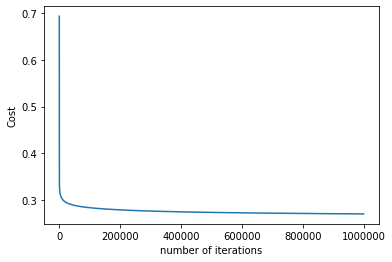

In [18]:
plt.plot(range(len(cost)),cost)
plt.xlabel('number of iterations')
plt.ylabel('Cost')
#print(w)# first value of w will be the bias value for us 

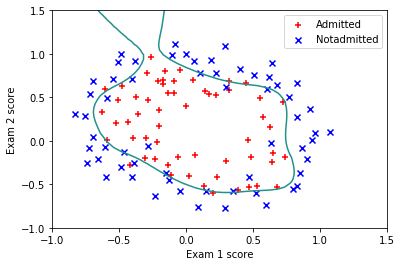

In [19]:
# plotting the decision boundary for the above result : 
plt.scatter(pos[:,0],pos[:,1],c="r",marker="+",label="Admitted")
plt.scatter(neg[:,0],neg[:,1],c="b",marker="x",label="Notadmitted")


def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms)) # forms an input feature for one example
    return out

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
# forming all the values for contour fitting:
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6) , w)

        
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

## the result is due to ovefitting on data too much 

### Implementing the same thing with a little different vectorization to get more clarity on vector part

In [33]:
# implementing the same without using 1 as x0 in input vector 
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up
    to the given degree
    """
    out = 0
    for i in range(1,degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j).reshape(1,len(x1)) # without reshape they are in (n,) form 
            if type(out) == int :
                out = terms
                continue
            out = np.vstack((out,terms)) # to add elements adjacent to the vector
            #print(terms)
    return out

X = (np.array(df))
X = mapFeature(X[:,0], X[:,1],6)
print(X[1]) # contains x0 x1 x2 x3 ...  # for the first training example 
Y = np.array(df['y']).reshape(1,len(Y))

[ 0.69956   0.68494   0.69225   0.50219   0.46564   0.2098    0.034357
 -0.19225  -0.40424  -0.51389  -0.56506  -0.5212   -0.24342  -0.18494
  0.48757   0.5826    0.53874   0.81652   0.69956   0.63377   0.59722
  0.33406   0.005117 -0.27266  -0.39693  -0.60161  -0.53582  -0.53582
  0.54605   0.77997   0.96272   0.8019    0.64839   0.47295   0.31213
  0.027047 -0.21418  -0.18494  -0.16301  -0.41155  -0.2288   -0.18494
 -0.14108   0.012427  0.15863   0.26827   0.44371   0.52412   0.67032
  0.69225   0.57529   0.39985   0.55336   0.35599   0.17325   0.21711
 -0.016813 -0.27266   0.93348   0.77997   0.61915   0.75804   0.7288
  0.59722   0.50219   0.3633    0.27558   0.085526  0.012427 -0.082602
 -0.20687  -0.36769  -0.5212   -0.55775  -0.7405   -0.5943   -0.41886
 -0.57968  -0.76974  -0.75512  -0.57968  -0.4481   -0.41155  -0.25804
 -0.25804   0.041667  0.2902    0.68494   0.70687   0.91886   0.90424
  0.70687   0.77997   0.91886   0.99196   1.1089    1.087     0.82383
  0.88962   0.66301

In [34]:
def LOGISTIC(X,Y,num_iter = 1000 , lr = 3):
    # No need to normalize as told 
    w = np.zeros((X.shape[0],1)) # since data is already in similar range we don' need to normalize 
    b = 0
    m = Y.shape[1]
    dj = []
    for i in range(num_iter+1):
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        w = w - lr*dw
        b = b - lr*((1/m)*np.sum(dz))
        if i % 100 == 0:
            print('cost after',i,'iterations :',cost)
    return w,b,dj

In [35]:
w,b,cost = LOGISTIC(X,Y)

cost after 0 iterations : 0.6931471805599454
cost after 100 iterations : 0.3766415566991351
cost after 200 iterations : 0.3512782300366461
cost after 300 iterations : 0.3422625064499813
cost after 400 iterations : 0.3374449211327109
cost after 500 iterations : 0.3342596897854356
cost after 600 iterations : 0.33188613569841163
cost after 700 iterations : 0.3299907805913757
cost after 800 iterations : 0.32841272071622046
cost after 900 iterations : 0.3270630712410402
cost after 1000 iterations : 0.32588714460553275


Text(0, 0.5, 'Cost')

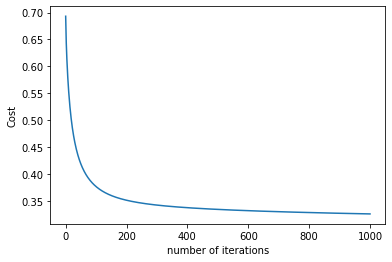

In [36]:
plt.plot(range(len(cost)),cost)
plt.xlabel('number of iterations')
plt.ylabel('Cost')
# print(b)
# print(w)
# we see that same values are predicted !!

No handles with labels found to put in legend.


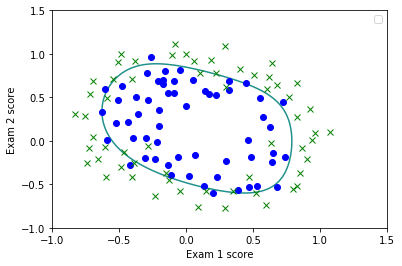

In [46]:
# plotting decision boundary for the above :
plt.plot(pos[:,0],pos[:,1],'bo')
plt.plot(neg[:,0],neg[:,1],'gx')
plt.xlabel('x1')
plt.ylabel('x2')

def plotdata(x1,x2,degree):
    out = 0
    k = 0
    for i in range(1,degree+1):
        for j in range(i+1):
            term = x1**(i-j) * x2**(j)
            if k == 0:
                out = term
                k = 1
                continue
            out = np.vstack((out,term))
    return out

u_vals = np.linspace(-1,1.5,100)
v_vals= np.linspace(-1,1.5,100)
z=np.zeros((len(u_vals),len(v_vals)))
# forming all the values for contour fitting:
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(plotdata(u_vals[i],v_vals[j],6).T,w) + b

        
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

## hence verified for above that giving more features help in deduction
## Now using some regularization and seeing the effect on decision boundary

cost after 0 iterations : 0.6931471805599454
cost after 100 iterations : 0.5343000597830535
cost after 200 iterations : 0.5293583795060491
cost after 300 iterations : 0.5290341830434108
cost after 400 iterations : 0.5290061763582775
cost after 500 iterations : 0.5290031715752622
cost after 600 iterations : 0.5290027924545535
cost after 700 iterations : 0.5290027391950415
cost after 800 iterations : 0.5290027312008033
cost after 900 iterations : 0.5290027299517415
cost after 1000 iterations : 0.5290027297516592


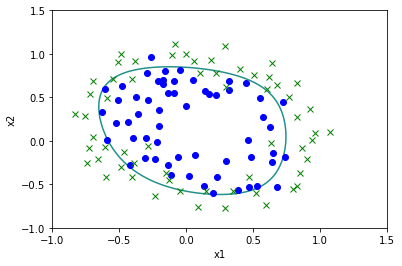

In [59]:
X = (np.array(df))
X = mapFeature(X[:,0], X[:,1],6)
#print(X[1]) # contains x0 x1 x2 x3 ...  # for the first training example 
#Y = np.array(df['y']).reshape(1,len(Y))

def LOGISTIC(X,Y,num_iter = 1000 , lr = 1,lamda = 1):
    # No need to normalize as told 
    w = np.zeros((X.shape[0],1)) # since data is already in similar range we don't need to normalize 
    b = 0
    m = Y.shape[1]
    dj = []
    for i in range(num_iter+1):
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h)) + (lamda/(2*m))*np.sum(w**2)
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T) + (lamda/m)*(w)
        w = w - lr*dw
        b = b - lr*((1/m)*np.sum(dz))
        if i % 100 == 0:
            print('cost after',i,'iterations :',cost)
    return w,b,dj

w,b,cost = LOGISTIC(X,Y)
# plt.plot(range(len(cost)),cost)
# plt.xlabel('number of iterations')
# plt.ylabel('Cost')
# print(b)
# print(w)
# we see that same values are predicted !!

# plotting decision boundary for the above :
plt.plot(pos[:,0],pos[:,1],'bo')
plt.plot(neg[:,0],neg[:,1],'gx')
plt.xlabel('x1')
plt.ylabel('x2')

def plotdata(x1,x2,degree):
    out = 0
    k = 0
    for i in range(1,degree+1):
        for j in range(i+1):
            term = x1**(i-j) * x2**(j)
            if k == 0:
                out = term
                k = 1
                continue
            out = np.vstack((out,term))
    return out

u_vals = np.linspace(-1,1.5,100)
v_vals= np.linspace(-1,1.5,100)
z=np.zeros((len(u_vals),len(v_vals)))
# forming all the values for contour fitting:
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(plotdata(u_vals[i],v_vals[j],6).T,w) + b

        
plt.contour(u_vals,v_vals,z.T,0)

Text(0, 0.5, 'Cost')

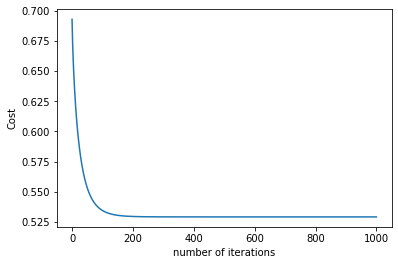

In [60]:
plt.plot(range(len(cost)),cost)
plt.xlabel('number of iterations')
plt.ylabel('Cost')